In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0, 0.5, '')

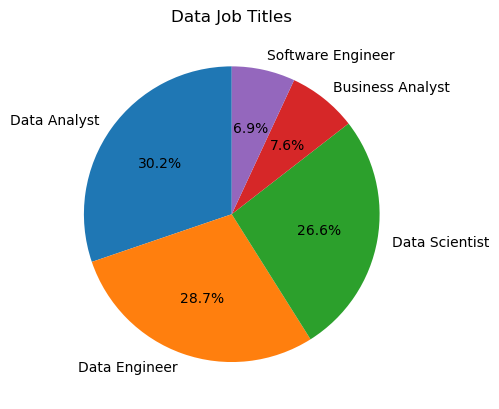

In [8]:
df['job_title_short'].value_counts().head().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Data Job Titles')
plt.ylabel('')

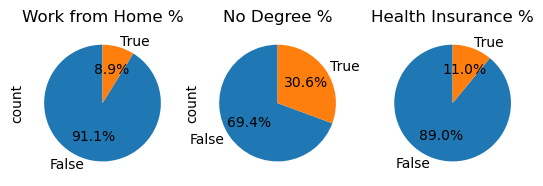

In [14]:
fig, ax = plt.subplots(1, 3)
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',ax=ax[0],title='Work from Home %')
df['job_no_degree_mention'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',ax=ax[1], title='No Degree %')
df['job_health_insurance'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',ax=ax[2],title='Health Insurance %')
plt.ylabel('')
plt.show()

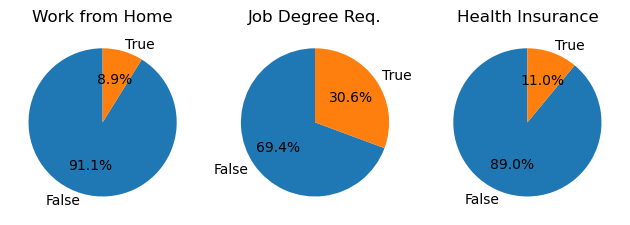

In [19]:
fig, ax = plt.subplots(1,3)

dict_column={
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance'}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)
    fig.tight_layout()